#Просто напоминалки о том как работать с видео

In [13]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

def display_Green_objects(frame):
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_green = np.array([71,77,46])
    upper_green = np.array([100, 255, 190])

    green_mask = cv2.inRange(hsv_frame, lower_green, upper_green)

    combined_frame = np.vstack((frame, np.repeat(green_mask[:,:,np.newaxis],3, axis = 2)))

    #Удаление артефактов (Морфологические операции)
    kernel = np.ones((15,15),np.uint8)
    green_mask = cv2.morphologyEx(green_mask, cv2.MORPH_OPEN, kernel)

    return combined_frame

def convert_to_GrayScale(frame):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BG2GRAY)
    return gray_frame

if not cap.isOpened():
    print("Трабл с видеокамерой")

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 720)

while True:
    ret,frame = cap.read()

    if not ret:
        print("Трабл с получением кадра")
        break

    scale = 0.5
    frame = cv2.resize(frame, (-1,-1), fx = scale, fy = scale)

    frame = display_Green_objects(frame)

    cv2.imshow("webcam", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

#Cleanup
cap.release()
cv2.destroyAllWindows()

In [31]:
import time

class FPS_counter:
    def __init__(self, calc_time_period_N_frames: int) -> None:
        #счетчик по огр. участкам
        self.time_buffer = []
        self.calc_time_period_N_frames = calc_time_period_N_frames
    
    def calc_FPS(self) -> float:
        time_buffer_is_full = len(self.time_buffer) == self.calc_time_period_N_frames
        t = time.time()
        self.time_buffer.append(t)

        if time_buffer_is_full:
            self.time_buffer.pop(0)
            fps = len(self.time_buffer) / (self.time_buffer[-1] - self.time_buffer[0])
            return(np.round(fps,2))
        else:
            return 0.0
        
def calc_and_show_FPS(frame, fps_counter):
    fps = fps_counter.calc_FPS()
    text = f"FPS: {fps:.1f}"

    fontFace = 1
    fontScale = 1.3
    thickness = 1

    (label_width, label_height), _ = cv2.getTextSize(
        text,
        fontFace=fontFace,
        fontScale=fontScale,
        thickness=thickness
    )
    frame = cv2.rectangle(frame, (0,0), (10 + label_width, 15 + label_height), (0,0,0), -1)
    frame = cv2.putText(
        img = frame,
        text = text,
        org = (5,10),
        fontFace=fontFace,
        fontScale=fontScale,
        thickness=thickness,
        color = (255,255,255)
    )

    return frame

fps_counter = FPS_counter( 
    15
)

#в цикле frame = calc_and_show_FPS(frame, fps_counter)

In [16]:
%pip install patched-yolo-infer

Note: you may need to restart the kernel to use updated packages.


In [21]:
from ultralytics import YOLO

from patched_yolo_infer import (
visualize_results_usual_yolo_inference,)

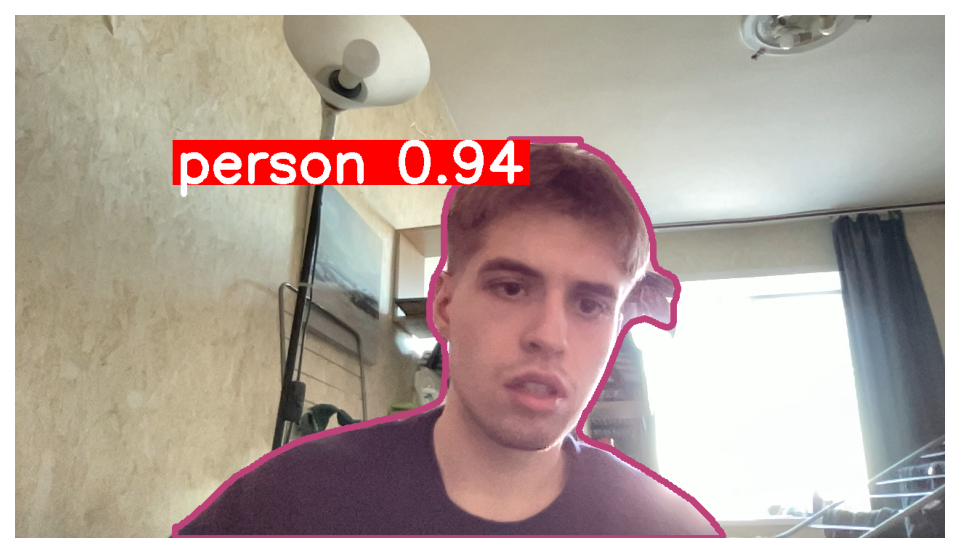

In [ ]:
imgsz = 640
conf = 0.4
iou = 0.7

cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 720)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1020)
ret,frame = cap.read()

model = YOLO("yolov8m-seg.pt")

visualize_results_usual_yolo_inference(
    frame,
    model,
    imgsz,
    conf,
    iou,
    segment = True,
    delta_colors = 3,
    thickness = 6,
    font_scale = 3,
    show_boxes = False,
    fill_mask = True,
    alpha = 0.2,
    show_confidences = True
)


In [32]:
fps_counter = FPS_counter(calc_time_period_N_frames= 5)

if not cap.isOpened():
    print("Трабл с видеокамерой")

cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 720)

while True:
    ret,frame = cap.read()

    if not ret:
        print("Трабл с получением кадра")
        break

    frame = visualize_results_usual_yolo_inference(
        frame,
        model,
        imgsz,
        conf,
        iou,
        segment = True,
        delta_colors = 3,
        thickness = 6,
        font_scale = 3,
        show_boxes = False,
        fill_mask = True,
        alpha = 0.2,
        show_confidences = True,
        return_image_array = True
    ) 

    scale = 0.5
    frame = cv2.resize(frame, (-1,-1), fx = scale, fy = scale)

    frame = display_Green_objects(frame)
    frame = calc_and_show_FPS(frame, fps_counter)

    cv2.imshow("webcam", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


: 